In [87]:
import pandas as pd 
import json
import numpy as np

In [88]:
with open('matches.json', 'r') as matchesfile:
	matches = json.load(matchesfile)
with open('results.json', 'r') as resultsfile:
	results = json.load(resultsfile)


In [89]:
columns = ['r'+str(i) for i in range(121)]
columns += (['d'+str(i) for i in range(121)])
df = pd.DataFrame(matches, columns=columns)
res = pd.Series(results, name='Result')

In [90]:
df['Rad Win'] = res
df

,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,...,d112,d113,d114,d115,d116,d117,d118,d119,d120,Rad Win
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
49998,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [91]:
df = df.drop_duplicates()
df

,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,...,d112,d113,d114,d115,d116,d117,d118,d119,d120,Rad Win
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
49998,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [92]:
y = df.pop('Rad Win')
X = df

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.05)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(47500, 242) (47500,)
(2500, 242) (2500,)


In [96]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [137]:
model = tf.keras.Sequential([
  Dense(256, input_shape=(242,)), 
  Dense(256, activation='relu'), 
  Dense(256, activation='relu'),
  Dropout(0.7),
  Dense(1, activation='sigmoid'),
])

optimizer = Adam(lr=0.001)

model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 256)               62208     
_________________________________________________________________
dense_122 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_123 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_124 (Dense)            (None, 1)                 257       
Total params: 194,049
Trainable params: 194,049
Non-trainable params: 0
_________________________________________________________________


In [131]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(X_train, y_train,batch_size=200, verbose=2, epochs=25, validation_data=(X_test, y_test), callbacks=[es])
history

Epoch 1/25
238/238 - 1s - loss: 0.6902 - accuracy: 0.5331 - val_loss: 0.6830 - val_accuracy: 0.5568
Epoch 2/25
238/238 - 1s - loss: 0.6804 - accuracy: 0.5661 - val_loss: 0.6838 - val_accuracy: 0.5612
Epoch 00002: early stopping


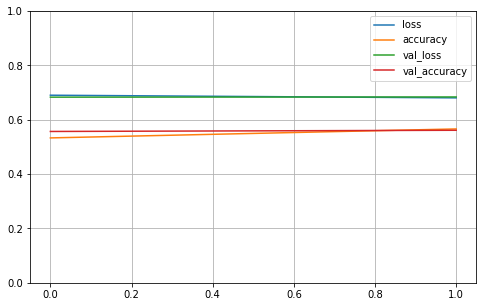

In [132]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [140]:
from sklearn.model_selection import StratifiedKFold

seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, y):
	model = tf.keras.Sequential([
		Dense(256, input_shape=(242,)), 
		Dense(1, activation='sigmoid'),
	])
	optimizer = Adam(lr=0.001)
	model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])
	model.fit(X.iloc[train], y.iloc[train], epochs=3, batch_size=200, verbose=0)
	scores = model.evaluate(X.iloc[test], y.iloc[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 55.18%
accuracy: 55.78%
accuracy: 56.47%
accuracy: 55.42%
accuracy: 55.64%
55.70% (+/- 0.44%)


In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
RFC = RandomForestClassifier(n_estimators=500, max_depth=32)
RFC.fit(X_train, y_train)

y_pred = RFC.predict(X_test)
print('Accuracy ',accuracy_score(y_test, y_pred))
print('Precision ',precision_score(y_test, y_pred))
print('Recall ',recall_score(y_test, y_pred))

Accuracy  0.5692
Precision  0.5695443645083933
Recall  0.7257448433919023
